In [32]:
import torch
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import hiddenlayer as hl
import matplotlib.pyplot as plt
import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('datasets/train.csv', index_col=0)

In [4]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.shape

(10886, 11)

Text(0.5, 1.0, 'Number of bikes rented per season')

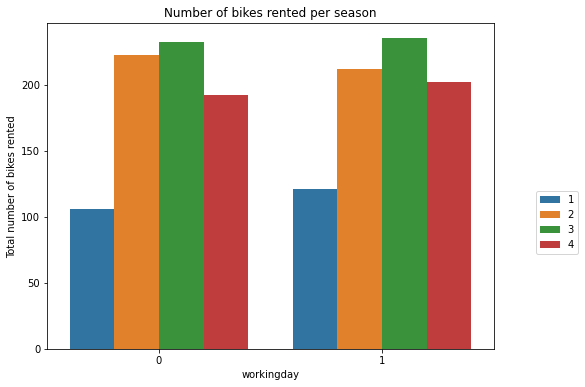

In [6]:
plt.figure(figsize=(8,6))
sns.barplot('workingday', 'count', hue='season', data=data, ci=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.2,0.5))
plt.xlabel('workingday')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

Text(0, 0.5, 'Total number of bikes rented')

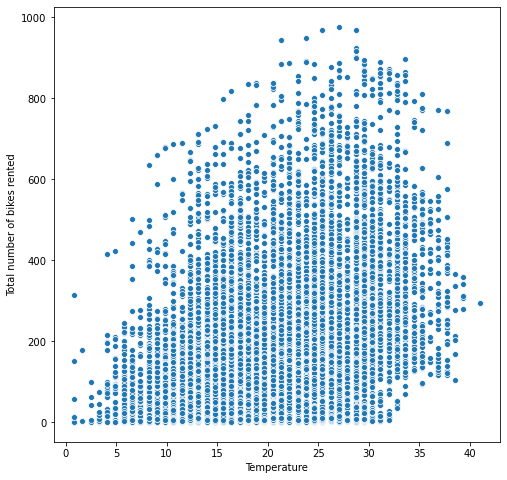

In [7]:
plt.figure(figsize=(8,8))
fig = sns.scatterplot(x='temp', y='count', data=data)
plt.xlabel('Temperature')
plt.ylabel('Total number of bikes rented')

In [8]:
data = pd.get_dummies(data, columns=['season'])
data.sample(5)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-08 22:00:00,0,1,3,25.42,25.760,100,6.0032,5,65,70,0,0,1,0
2012-05-10 14:00:00,0,1,1,22.96,26.515,37,27.9993,61,186,247,0,1,0,0
2011-08-18 14:00:00,0,1,1,33.62,37.880,46,22.0028,67,115,182,0,0,1,0
2011-12-13 18:00:00,0,1,1,13.94,15.910,42,15.0013,12,370,382,0,0,0,1
2012-08-02 02:00:00,0,1,1,27.06,30.305,83,6.0032,3,8,11,0,0,1,0


In [9]:
columns = ['registered', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'season_1', 'season_2', 'season_3', 'season_4']
features = data[columns]
features.head()

,registered,holiday,workingday,weather,temp,atemp,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,
2011-01-01 00:00:00,13,0,0,1,9.84,14.395,1,0,0,0
2011-01-01 01:00:00,32,0,0,1,9.02,13.635,1,0,0,0
2011-01-01 02:00:00,27,0,0,1,9.02,13.635,1,0,0,0
2011-01-01 03:00:00,10,0,0,1,9.84,14.395,1,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,1,0,0,0


In [10]:
target = data[['count' ]]
target.head()

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1


In [11]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2)

In [12]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [13]:
X_train_tensor.shape

torch.Size([8708, 10])

In [14]:
Y_train_tensor.shape

torch.Size([8708, 1])

In [15]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor) #Creates a small dataset from the large given data
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [16]:
len(train_loader)

88

In [17]:
features_batch, target_batch = iter(train_loader).next() #Loads in first batch of feature and target
features_batch.shape

torch.Size([100, 10])

In [18]:
inp = X_train_tensor.shape[1]
out = 1
hid = 10
loss_fn = torch.nn.MSELoss()

In [19]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid), torch.nn.Linear(hid, out))

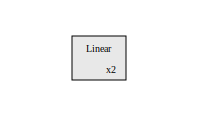

In [20]:
hl.build_graph(model, torch.zeros([10, inp]))

In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
total_steps = len(train_loader)
num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

tep [39/88], Loss: 1506.3966
Epoch [2001/10000], Step [40/88], Loss: 1356.2550
Epoch [2001/10000], Step [41/88], Loss: 946.0589
Epoch [2001/10000], Step [42/88], Loss: 1218.5543
Epoch [2001/10000], Step [43/88], Loss: 892.4332
Epoch [2001/10000], Step [44/88], Loss: 917.2573
Epoch [2001/10000], Step [45/88], Loss: 689.8716
Epoch [2001/10000], Step [46/88], Loss: 1426.5591
Epoch [2001/10000], Step [47/88], Loss: 846.9377
Epoch [2001/10000], Step [48/88], Loss: 1247.8246
Epoch [2001/10000], Step [49/88], Loss: 1468.0184
Epoch [2001/10000], Step [50/88], Loss: 1357.2841
Epoch [2001/10000], Step [51/88], Loss: 791.3081
Epoch [2001/10000], Step [52/88], Loss: 858.5517
Epoch [2001/10000], Step [53/88], Loss: 1461.4666
Epoch [2001/10000], Step [54/88], Loss: 792.6406
Epoch [2001/10000], Step [55/88], Loss: 758.7876
Epoch [2001/10000], Step [56/88], Loss: 1260.0038
Epoch [2001/10000], Step [57/88], Loss: 975.2449
Epoch [2001/10000], Step [58/88], Loss: 881.2717
Epoch [2001/10000], Step [59/88]

In [23]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor)

In [24]:
sample = x_test.iloc[45]
sample

registered    31.00
holiday        0.00
workingday     0.00
weather        2.00
temp          20.50
atemp         24.24
season_1       0.00
season_2       1.00
season_3       0.00
season_4       0.00
Name: 2012-06-02 06:00:00, dtype: float64

In [25]:
sample_tensor = torch.tensor(sample.values, dtype=torch.float)
sample_tensor

tensor([31.0000,  0.0000,  0.0000,  2.0000, 20.5000, 24.2400,  0.0000,  1.0000,
         0.0000,  0.0000])

In [27]:
with torch.no_grad():
    y_pred = model(sample_tensor)

print('Predicted count: ', (y_pred.item()))
print('Actual count: ', (y_test.iloc[45]))

Predicted count:  78.70996856689453
Actual count:  count    36
Name: 2012-06-02 06:00:00, dtype: int64


In [28]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [29]:
y_pred = y_pred_tensor.detach().numpy()
y_pred.shape

(2178, 1)

In [30]:
y_test.values.shape

(2178, 1)

In [33]:
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
compare_df.sample(10)

,actual,predicted
2013,115,128.565292
28,178,161.928391
516,212,216.471954
1938,205,204.685501
1703,379,374.230988
1909,198,170.913651
1508,96,131.829605
256,362,351.916138
1016,186,199.678268
674,286,272.391174


In [34]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9628904331912304

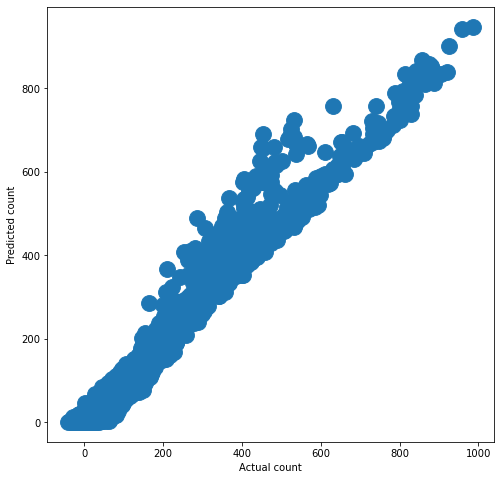

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(y_pred, y_test.values, s=250)
plt.xlabel('Actual count')
plt.ylabel('Predicted count')
plt.show()